# Logistic Regression 


In this project, we will complete an effective binomial logistic regression to make predictions for a dependent variable based on one independent variable.To accomplish this, we will perform a complete logistic regression analysis, which includes creating and fitting a model then evaluating model results.

We will use the case study given below to carry out this project.
 

#### Case Study:

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 


*This project has 4 parts:*

**Part 1:** Importing packages and loading data

**Part 2:** Exploring the data and completing the cleaning process

**Part 3:** Building a binomial logistic regression model 

**Part 4:** Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. We will use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [145]:
# import packages
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Load the dataset

In [146]:
# load data
df = pd.read_csv(r"C:\Users\Ghost\Desktop\project_files\Files\Invistico_Airline.csv")

## Step 2: Data exploration and Cleaning

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [147]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Some of our column names seem to start in lower_case and others upper_case.

Change all column_names to lower_case and replace space with underscore

In [148]:
# change column_names to lower_case
df.columns = df.columns.str.lower()

# replace space with underscore
df.columns = df.columns.str.replace(' ', '_')

# confirm changes
df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [149]:
data.shape

(129880, 22)

Generate summary statistics using the `describe()` method.

In [150]:
df.describe()

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


And summary information using the `info()` method.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   seat_comfort                       129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   food_and_drink                     129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  inflight_wifi_service              129880 non-null  int64  
 11  inflight_entertainment             1298

Check for number of duplicates using the `duplicated()` method

In [152]:
df.duplicated().sum()

0

Check for missing values using the `isna()` method

In [153]:
df.isna().sum()

satisfaction                           0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

Only the `arrival_delay_in_minutes` column contain missing values, totalling 393. Our main concern in this project is with the `inflight_entertainment` column, but given the small ratio of the missing values to our total data, we can remove them.

Drop the missing rows using the `dropna()` method

In [154]:
# drop missing values
df = df.dropna()

# confirm changes 
df.isna().sum()

satisfaction                         0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

Check for outliers using box plots

Only the `inflight_entertainment` column is the numerical column relevant to our regression model so we will only create a single plot

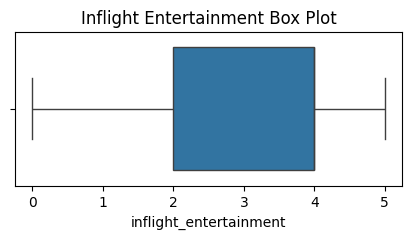

In [155]:
#Box Plot
plt.figure(figsize = (5,2))
sns.boxplot(x = df['inflight_entertainment'], fliersize = 1)
plt.title('Inflight Entertainment Box Plot')
plt.show()

The box plot above shows no outliers for `inflight_entertainment`

Before proceeding, check class balance of our outcome variable

In [49]:
# check class balance percentage
round(df['satisfaction'].value_counts(normalize = True)*100, 2)

satisfaction
satisfied       54.74
dissatisfied    45.26
Name: proportion, dtype: float64

54.74% of the data accounts for satisfied customers, with dissatisfied customers making up the remaining 45.26%.

The class balance is satisfactory.

### Prepare the data

If we want to build our model later in the notebook, the dependent variable `satisfaction` cannot be "of type object." 

We shall Convert `satisfaction` column from categorical to float and make the `inflight_entertainment` column "of type float" as well. 

#### Convert the categorical column `satisfaction` into numeric

To build our model, we need to convert our categorical outcome variable to a numeric format.

This can be done using one-hot encoding.

In [169]:
# one hot encode 'satisfaction' column
df['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df[['satisfaction']]).toarray()

# confirm changes
df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4.0,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2.0,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0.0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4.0,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3.0,4,2,2,0,2,4,2,5,0,0.0


Convert `inflight_entertainment` to float

In [162]:
# change inflight entertainment datatype to float
df['inflight_entertainment']  = df['inflight_entertainment'].astype(float)

# confirm changes
df.dtypes

satisfaction                         float64
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment               float64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
dtype: obj

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [163]:
# split data into training and testing sets
x = df[['inflight_entertainment']]
y = df['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Step 3: Model building

#### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [168]:
# build and fit model
clf = LogisticRegression().fit(x_train, y_train)

#### Obtain parameter estimates 

In [165]:
clf.intercept_

array([-3.19359054])

In [166]:
clf.coef_

array([[0.99752883]])

#### Create a plot of the model

Create a plot of the model to visualize results

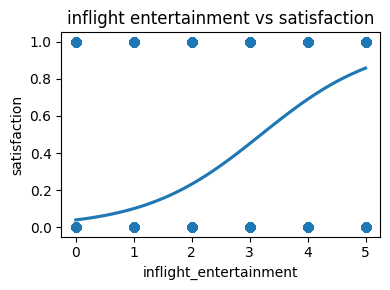

In [167]:
# display regression plot
plt.figure(figsize = (4,3))
sns.regplot(x ='inflight_entertainment', y ='satisfaction', data =df, logistic = True, ci = None)
plt.title('inflight entertainment vs satisfaction')
plt.tight_layout()
plt.show()

The graph seems to indicate that the higher the `inflight_entertainment` value, the higher the customer satisfaction

## Step 4. Results and evaluation


#### Predict the outcome for the test dataset

Now that we have completed our regression, we will review and analyze our results. 

First, we input the holdout dataset into the `predict` function to get the predicted labels from the model.

In [144]:
y_pred = clf.predict(x_test)

#### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [142]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

#### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [143]:
# print out our evaluation parameters

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f' Accuracy: {accuracy}')
print(f' Precision: {precision}')
print(f' Recall: {recall}')
print(f' F1: {f1}')

 Accuracy: 0.8015290756042938
 Precision: 0.8161420273561926
 Recall: 0.8215296114673708
 F1: 0.8188269574208102


#### Plot a confusion matrix

Plot a confusion matrix to visualize the types of errors made by the algorithm.

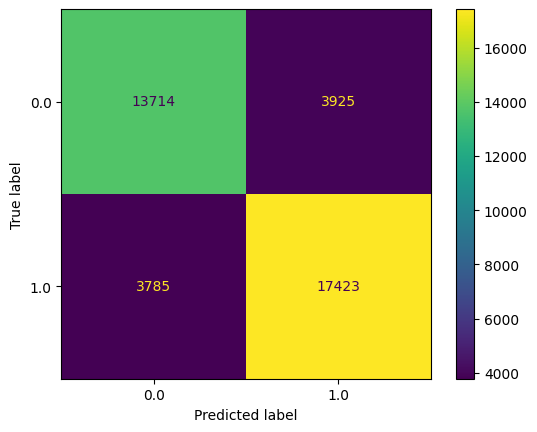

In [108]:
# plot confusion matrix
import sklearn.metrics as metrics 
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

Our confusion matrix show values for both false positives and false negatives to be just under 4000 each. The true positives and true negatives both showed results above 13000, which are relatively high, hence our accuracy score of 81%.

